# Random Asset Exchange Experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Basic model:

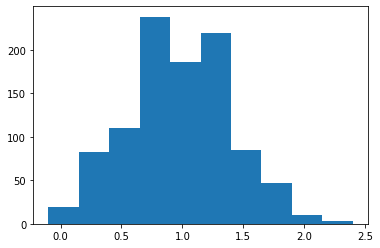

In [6]:
n = 1000
money = np.ones(n)
coin = 0.1
nsteps = 10000

for i in range(nsteps):
    p1 = np.random.randint(low=0, high=n)
    p2 = np.random.randint(low=0, high=n)
    if p1 == p2:
        continue
    if money[p1] > 0:
        money[p1] -= coin
        money[p2] += coin
        
plt.hist(money);        

Add in Gini Index for inequality:

${\displaystyle G(S)=1-{\frac {2}{n-1}}\left(n-{\frac {\sum _{i=1}^{n}iy_{i}}{\sum _{i=1}^{n}y_{i}}}\right).}$

In [7]:
def gini(x):
    y = np.sort(x) # sort by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )

# Test the function to see if it works how it should:

print('This should be 0:',gini([1,1,1,1]))
print('This should be 1:',gini([1,0,0,0]))
print('This should be something else:',gini([10,5,1,1]))
        

This should be 0: 0.0
This should be 1: 1.0
This should be something else: 0.6078431372549019


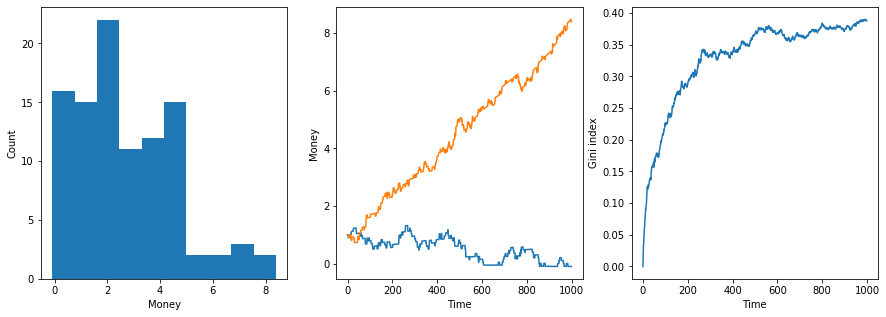

In [11]:
n = 100
coin = 0.1
nsteps = 1000
trades_per_step = 10
interest = 0.001
money = np.ones(shape=(nsteps,n))
gini_history = np.zeros(nsteps)


for t in range(1,nsteps):
    money[t,:] = money[t-1,:]*(1+interest)
    

    for i in range(trades_per_step):
        p1 = np.random.randint(low=0, high=n)
        p2 = np.random.randint(low=0, high=n)
        if p1 == p2:
            continue
        if money[t,p1] > 0:
            money[t,p1] -= coin
            money[t,p2] += coin
    gini_history[t] = gini(money[t,:])
        

# Figures:  

plt.figure(figsize=(15,5)) 
plt.subplot(1,3,1);
plt.hist(money[-1,:], bins=10);
plt.xlabel('Money');
plt.ylabel('Count');

plt.subplot(1,3,2);
poor_person = np.argmin(money[-1,:])
rich_person = np.argmax(money[-1,:])
plt.plot(money[:,poor_person]);
plt.plot(money[:,rich_person]);
plt.xlabel('Time');
plt.ylabel('Money');

plt.subplot(1,3,3);
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');